In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [62]:
from corr_utils import find_correspondences
from dataloader import Dataset

import numpy as np
# import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime
from skimage.feature import plot_matches


In [6]:
# load images
img_dir = 'stage1/boot/images'

In [12]:
# walk through the directory and load all images
img_list = []
img_names = []
for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file.endswith('.jpg'):
            img_list.append(os.path.join(root, file))
            img_names.append(int(file.split('.')[0]))

img_list.sort()
img_names.sort()


In [16]:
img_names

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100]

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100]

In [18]:
img1 = cv2.imread(img_list[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img_list[1], cv2.IMREAD_GRAYSCALE)
matches = find_correspondences(img1, img2)

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/fundam.cpp:385: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'findHomography'


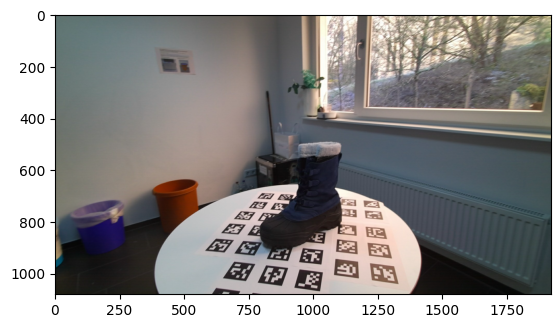

In [85]:
kp1, kp2, matches = find_correspondences(img1, img2)

In [63]:
len(matches)

42

In [65]:
kp1

(< cv2.KeyPoint 0x164d85440>,
 < cv2.KeyPoint 0x164d84f30>,
 < cv2.KeyPoint 0x164d84f90>,
 < cv2.KeyPoint 0x164d84db0>,
 < cv2.KeyPoint 0x164d84e70>,
 < cv2.KeyPoint 0x164d84fc0>,
 < cv2.KeyPoint 0x164d85020>,
 < cv2.KeyPoint 0x164d85080>,
 < cv2.KeyPoint 0x164d85050>,
 < cv2.KeyPoint 0x164d85170>,
 < cv2.KeyPoint 0x164d851a0>,
 < cv2.KeyPoint 0x164d851d0>,
 < cv2.KeyPoint 0x164d85200>,
 < cv2.KeyPoint 0x164d85230>,
 < cv2.KeyPoint 0x164d85260>,
 < cv2.KeyPoint 0x164d85290>,
 < cv2.KeyPoint 0x164d852c0>,
 < cv2.KeyPoint 0x164d85380>,
 < cv2.KeyPoint 0x164d853b0>,
 < cv2.KeyPoint 0x164d853e0>,
 < cv2.KeyPoint 0x164d85410>,
 < cv2.KeyPoint 0x164d85470>,
 < cv2.KeyPoint 0x164d854a0>,
 < cv2.KeyPoint 0x164d85500>,
 < cv2.KeyPoint 0x164d85b00>,
 < cv2.KeyPoint 0x164d85b30>,
 < cv2.KeyPoint 0x164d85b90>,
 < cv2.KeyPoint 0x164d85bc0>,
 < cv2.KeyPoint 0x164d85bf0>,
 < cv2.KeyPoint 0x164d874e0>,
 < cv2.KeyPoint 0x164d87510>,
 < cv2.KeyPoint 0x164d87540>,
 < cv2.KeyPoint 0x164d87570>,
 < cv2.Key

In [72]:
kp1

(< cv2.KeyPoint 0x164d85440>,
 < cv2.KeyPoint 0x164d84f30>,
 < cv2.KeyPoint 0x164d84f90>,
 < cv2.KeyPoint 0x164d84db0>,
 < cv2.KeyPoint 0x164d84e70>,
 < cv2.KeyPoint 0x164d84fc0>,
 < cv2.KeyPoint 0x164d85020>,
 < cv2.KeyPoint 0x164d85080>,
 < cv2.KeyPoint 0x164d85050>,
 < cv2.KeyPoint 0x164d85170>,
 < cv2.KeyPoint 0x164d851a0>,
 < cv2.KeyPoint 0x164d851d0>,
 < cv2.KeyPoint 0x164d85200>,
 < cv2.KeyPoint 0x164d85230>,
 < cv2.KeyPoint 0x164d85260>,
 < cv2.KeyPoint 0x164d85290>,
 < cv2.KeyPoint 0x164d852c0>,
 < cv2.KeyPoint 0x164d85380>,
 < cv2.KeyPoint 0x164d853b0>,
 < cv2.KeyPoint 0x164d853e0>,
 < cv2.KeyPoint 0x164d85410>,
 < cv2.KeyPoint 0x164d85470>,
 < cv2.KeyPoint 0x164d854a0>,
 < cv2.KeyPoint 0x164d85500>,
 < cv2.KeyPoint 0x164d85b00>,
 < cv2.KeyPoint 0x164d85b30>,
 < cv2.KeyPoint 0x164d85b90>,
 < cv2.KeyPoint 0x164d85bc0>,
 < cv2.KeyPoint 0x164d85bf0>,
 < cv2.KeyPoint 0x164d874e0>,
 < cv2.KeyPoint 0x164d87510>,
 < cv2.KeyPoint 0x164d87540>,
 < cv2.KeyPoint 0x164d87570>,
 < cv2.Key

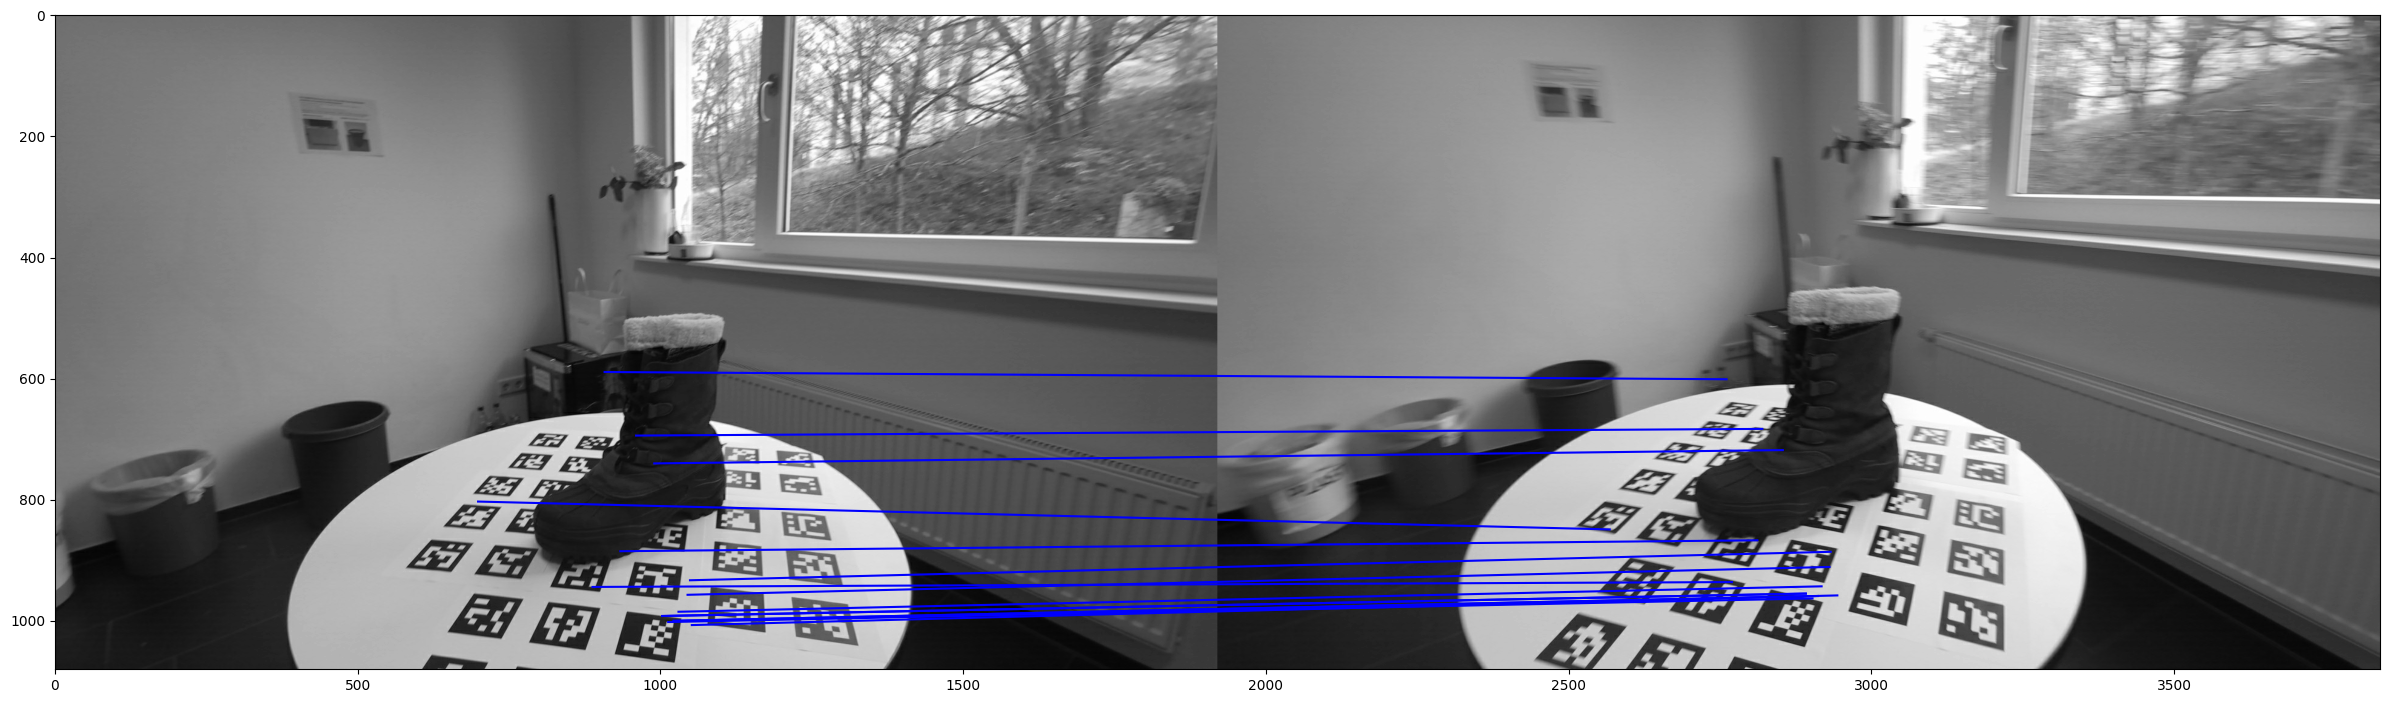

In [84]:
# filter kp1 and kp2 based on matches
pts1 = [kp1[int(match[0])].pt for match in matches]
pts2 = [kp2[int(match[1])].pt for match in matches]


# draw matches
fig, axs = plt.subplots(figsize=(30.0, 20.0))

plot_matches(
    axs,
    img1,
    img2,
    kp1,
    kp2,
    matches[:, :2].astype(int),
    keypoints_color='k',
    matches_color='b',
    only_matches=True,
)


In [42]:
img_names

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100]

In [43]:
matches

array([[ 38,  72],
       [667, 547],
       [722, 736],
       [761, 587]])

In [145]:
img_dir = "/Users/muhammadovais/uds/3dcv/Project/Stage_1_Data_ver_4/stage1/box/images"
parent_dir = os.path.dirname(img_dir)
img_list = []
img_names = []
for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file.endswith('.jpg'):
            img_list.append(os.path.join(root, file))
            img_names.append(int(file.split('.')[0]))

img_list.sort()
img_names.sort()

In [143]:
# get parent directory from img_dir


In [144]:
parent_dir

'/Users/muhammadovais/uds/3dcv/Project/Stage_1_Data_ver_4/stage1/box'

In [148]:
FLIP = False
start_index = 0
end_index = len(img_list)
approach = 'SIFT'
filter_matches = True
fb_consistency = True
THRESHOLD = 1000

f = "RANSAC" if filter_matches else 'NoFilter'
c = "FB" if fb_consistency else 'NoFB'
fl = "FLIP" if FLIP else 'NoFLIP'

target_folder = f"{parent_dir}/correspondences_{approach}_{f}_{c}_{fl}"
target_folder_dist = f'{target_folder}_distances'

os.makedirs(target_folder, exist_ok=True)
os.makedirs(target_folder_dist, exist_ok=True)

# Match each image with every other image
for i in range(start_index, end_index):
    for j in range(i + 1, len(img_list)):

        print("matching image {} with image {}".format(img_names[i],img_names[j]))
        image2 = cv2.imread(img_list[j], cv2.IMREAD_GRAYSCALE)
        image1 = cv2.imread(img_list[i], cv2.IMREAD_GRAYSCALE)
        
        kp1, kp2, matches = find_correspondences(image1, image2, method=approach, filter=filter_matches, fb_consistency=fb_consistency, threshold=THRESHOLD)

        if kp1 is None or kp2 is None or matches is None:
            print(f'No matches found between {img_list[i]} and {img_list[j]}')
            continue
        
        # save matches in txt file. Overwrite if file already exists
        with open(f'{target_folder}/{img_names[i]}_{img_names[j]}.txt', 'w') as f:
          for match in matches:
                pts1 = np.array(kp1[int(match[0])].pt)
                pts2 = np.array(kp2[int(match[1])].pt)
                if FLIP:
                    pts1 = np.flip(pts1)
                    pts2 = np.flip(pts2)
                f.write(f'{pts1[0]} {pts1[1]} {pts2[0]} {pts2[1]}\n')
        
        # save distances in txt file
        with open(f'{target_folder}/{img_names[i]}_{img_names[j]}_distances.txt', 'w') as f:
            for match in matches:
                f.write(f'{match[2]}\n')
        

matching image 0 with image 1
matching image 0 with image 2
matching image 0 with image 3
matching image 0 with image 4
matching image 0 with image 5
matching image 0 with image 6
matching image 0 with image 7
matching image 0 with image 8
matching image 0 with image 9
matching image 0 with image 10
matching image 0 with image 11
matching image 0 with image 12
matching image 0 with image 13
matching image 0 with image 14
matching image 0 with image 15
matching image 0 with image 16
matching image 0 with image 17
matching image 0 with image 18
matching image 0 with image 19
matching image 0 with image 20
matching image 0 with image 21
matching image 0 with image 22
matching image 0 with image 23
matching image 0 with image 24
matching image 0 with image 25
matching image 0 with image 26
matching image 0 with image 27
matching image 0 with image 28
matching image 0 with image 29
matching image 0 with image 30
matching image 0 with image 31
matching image 0 with image 32
matching image 0 

In [139]:
# flip 1x2 array
# np.flip(np.array(pts1))
# pts1

(1215.99560546875, 323.0665588378906)

In [127]:
img1 = cv2.imread(img_list[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img_list[1], cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None, )
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
len(good)

433

In [105]:
k1, k2, ms = find_correspondences(img1, img2, method='SIFT')
len(ms)

252

In [114]:
ms[:, :2]

array([[ 667.,  547.],
       [ 761.,  587.],
       [ 681.,  520.],
       [1432.,  742.],
       [1499.,  767.],
       [ 748.,  562.],
       [ 833.,  591.],
       [ 763.,  589.],
       [ 790.,  593.],
       [ 800.,  597.],
       [ 253.,  211.],
       [ 789.,  592.],
       [ 656.,  493.],
       [1433.,  743.],
       [1658.,  830.],
       [ 143.,  153.],
       [ 594.,  475.],
       [  58.,   61.],
       [2081., 1113.],
       [1850., 1057.],
       [ 240.,  182.],
       [ 759.,  583.],
       [ 481.,  400.],
       [1216.,  719.],
       [1560.,  847.],
       [ 479.,  372.],
       [ 756.,  574.],
       [ 894.,  634.],
       [ 758.,  582.],
       [ 214.,  219.],
       [ 213.,  218.],
       [1215.,  718.],
       [ 799.,  596.],
       [1451.,  799.],
       [2217., 1109.],
       [2282., 1124.],
       [2102., 1047.],
       [ 512.,  403.],
       [1849., 1056.],
       [ 903.,  688.],
       [ 580.,  477.],
       [ 657.,  494.],
       [1572.,  809.],
       [200

In [119]:
good

[[< cv2.DMatch 0x17a9cb9d0>],
 [< cv2.DMatch 0x17a9cbb50>],
 [< cv2.DMatch 0x17a9cbb30>],
 [< cv2.DMatch 0x17a9cbbf0>],
 [< cv2.DMatch 0x17a9cbc90>],
 [< cv2.DMatch 0x17a9cbdb0>],
 [< cv2.DMatch 0x17a9cbc50>],
 [< cv2.DMatch 0x17a9ec070>],
 [< cv2.DMatch 0x17a9ec270>],
 [< cv2.DMatch 0x17a9ec2f0>],
 [< cv2.DMatch 0x17a9ec370>],
 [< cv2.DMatch 0x17a9ec470>],
 [< cv2.DMatch 0x17a9ec4b0>],
 [< cv2.DMatch 0x17a9ec570>],
 [< cv2.DMatch 0x17a9ec730>],
 [< cv2.DMatch 0x17a9ec770>],
 [< cv2.DMatch 0x17a9ec830>],
 [< cv2.DMatch 0x17a9ec870>],
 [< cv2.DMatch 0x17a9ec9b0>],
 [< cv2.DMatch 0x17a9eca30>],
 [< cv2.DMatch 0x17a9eca70>],
 [< cv2.DMatch 0x17a9ecab0>],
 [< cv2.DMatch 0x17a9ecb70>],
 [< cv2.DMatch 0x17a9ecdb0>],
 [< cv2.DMatch 0x17a9ecdf0>],
 [< cv2.DMatch 0x17a9ece30>],
 [< cv2.DMatch 0x17a9ecef0>],
 [< cv2.DMatch 0x17a9ecfb0>],
 [< cv2.DMatch 0x17a9ed170>],
 [< cv2.DMatch 0x17a9ed1b0>],
 [< cv2.DMatch 0x17a9ed2f0>],
 [< cv2.DMatch 0x17a9ed4b0>],
 [< cv2.DMatch 0x17a9ed5b0>],
 [< cv2.DM

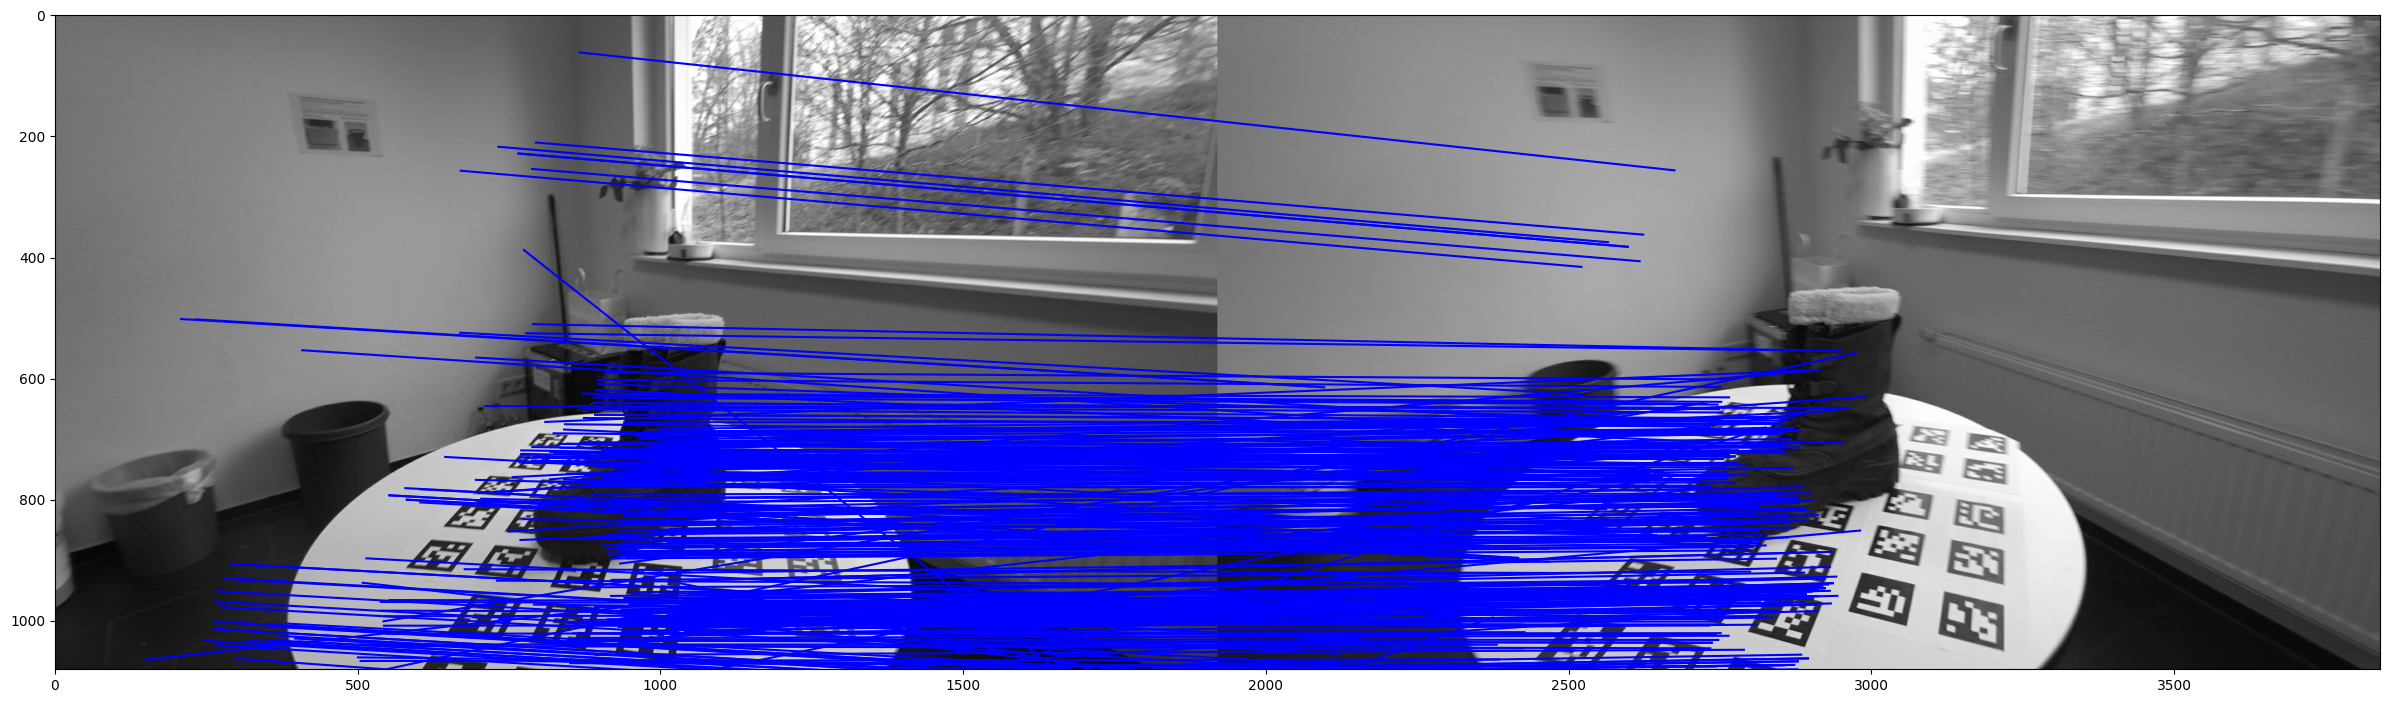

In [124]:
# draw matches
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(30.0, 20.0))
p1 = np.array([k.pt for k in kp1])
p2 = np.array([k.pt for k in kp2])

goods = np.array([[m[0].queryIdx, m[0].trainIdx] for m in good])


plot_matches(
    axs,
    img1,
    img2,
    p1,
    p2,
    np.array(goods),
    keypoints_color='k',
    matches_color='b',
    only_matches=True,
)

In [128]:
from dataloader import Dataset

d = Dataset('/Users/muhammadovais/uds/3dcv/Project/Stage_1_Data_ver_4/stage1/box')


AttributeError: 'Dataset' object has no attribute 'get_image'

In [131]:
d.

{}